# Problem Statement

-  Factors that affect the demand for shared bike
  -  which variables are significant in predicting the demand
  -  how well those variables describe the biike demand
-  cnt is the target variable.

## Reading and Understanding the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

C:\Users\Rakshu\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# check for missing values
df.info()
# no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


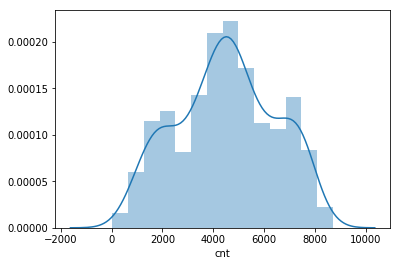

In [4]:
# Check if the data is normally distributed

sns.distplot(df['cnt'])
plt.show()

# it's negatively skewed.

## Exploratory Data Analysis

-  temp,atemp,windspeed,hum, and cnt 
- segmented univariate analysis
  -  percentage of cnt in summer,spring,winter
  - percentage of cnt in year 
  - percentage of cnt ini month
  - percentage of cnt in each weather
  - demand in holidays/weekends and working days 


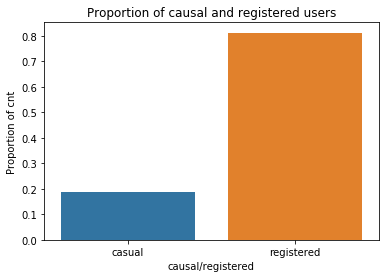

In [5]:
total_cnt = df['cnt'].sum()

casual_prop=df['casual'].sum()/total_cnt
registered_prop=df['registered'].sum()/total_cnt
sns.barplot(x=['casual','registered'],y=[casual_prop,registered_prop])
plt.title("Proportion of causal and registered users")
plt.xlabel("causal/registered")
plt.ylabel("Proportion of cnt")
plt.show()

# 80 % of user based that rent bikes are registered users

In [6]:
# derived metrics 

total_registered = df['registered'].sum()
total_casual = df['casual'].sum()
total_cnt = df['cnt'].sum()
df['casual_per'] = df['casual']/total_casual
df['registered_per']= df['registered']/total_registered


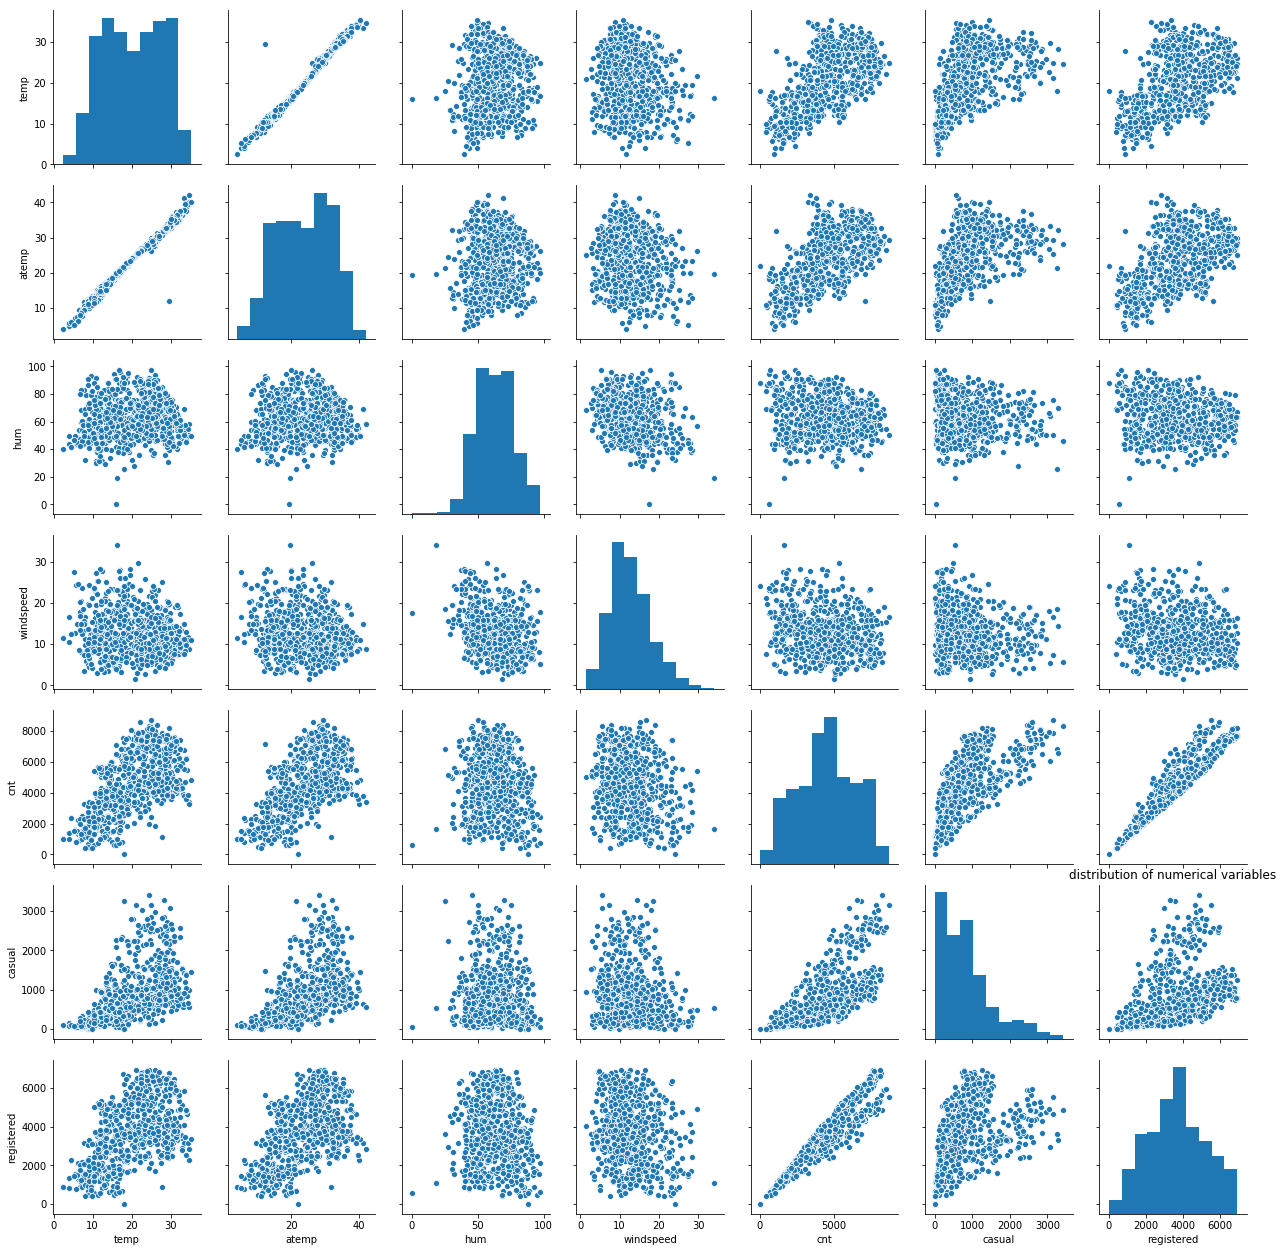

In [7]:
# visualising continous variables 
sns.pairplot(df[['temp','atemp','hum','windspeed','cnt','casual','registered']])
plt.title("distribution of numerical variables")
plt.show()

# temp and cnt have linear relationship
#temp and atemp have linear relationship. One of these features should be removed
# registered has a linear relationship with cnt


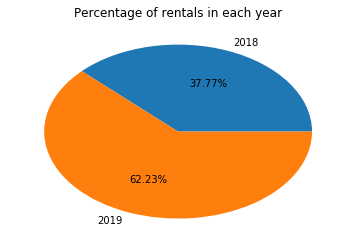

In [8]:
# percentage distribution of demands in each year
year_dist=df.groupby(by='yr')['cnt'].sum()/total_cnt
plt.pie(year_dist,labels=['2018','2019'],autopct = "%0.2f%%")
plt.title("Percentage of rentals in each year")
plt.show()
# 1,i.e 2019 has higher number of bike rentals than the year 2018 

In [9]:
# convert season to categorical
df['season']=df['season'].apply( lambda x:"spring" if x==1 else ("summer" if x==2 else ("fall" if x==3 else "winter")))
df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

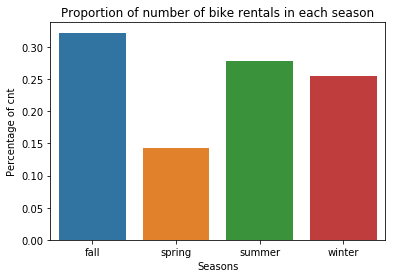

In [10]:
# percentage of demand in each season
total_cnt = df['cnt'].sum()
season_dist=(df[['season','cnt']].groupby(by='season').sum()/total_cnt)
sns.barplot(x=['fall','spring','summer','winter'],y= season_dist['cnt'])
plt.title("Proportion of number of bike rentals in each season")
plt.xlabel("Seasons")
plt.ylabel("Percentage of cnt")
plt.show()
# fall has the highest number of bike rentals , followed by summer,winter. Spring has the lowest demand

In [11]:
# connvert weathersit to categorical 
df['weathersit'].value_counts()

df['weathersit']=df['weathersit'].apply( lambda x:"clear" if x==1 else ("misty" if x==2 else ("light_rain" if x==3 else "heavy")))
df['weathersit'].value_counts()

clear         463
misty         246
light_rain     21
Name: weathersit, dtype: int64

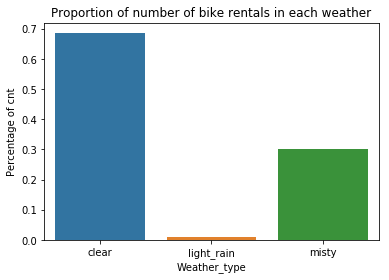

In [12]:
weather_dist=df.groupby(by='weathersit')['weathersit','cnt'].sum()/total_cnt
sns.barplot(x=['clear','light_rain','misty'],y= weather_dist['cnt'])
plt.title("Proportion of number of bike rentals in each weather")
plt.xlabel("Weather_type")
plt.ylabel("Percentage of cnt")
plt.show()


# clear weather , i.e following conditions have a higher demand for bike sharing Clear, Few clouds, Partly cloudy, Partly cloudy

In [13]:
# make month as categorical
import datetime
df['mnth_cat']=df['mnth'].apply(lambda x: datetime.datetime.strptime(str(x), "%m").strftime("%b"))

months_dist=df.groupby(by='mnth_cat')['mnth_cat','cnt'].sum()/total_cnt
months_dist.sort_values(by='cnt',ascending=False)

# june,july,aug and sept have high demands of bike sharing

,cnt
mnth_cat,
Aug,0.106718
Jun,0.105244
Sep,0.105137
Jul,0.104820
May,0.100791
Oct,0.097954
Apr,0.081770
Nov,0.077436
Mar,0.069563


In [14]:
df.drop('mnth',axis=1,inplace=True)

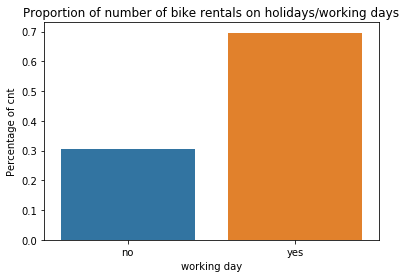

In [15]:
working_day_dist=df.groupby(by='workingday')['cnt'].sum()/total_cnt
sns.barplot(x=['no','yes'],y= working_day_dist)
plt.title("Proportion of number of bike rentals on holidays/working days")
plt.xlabel("working day")
plt.ylabel("Percentage of cnt")
plt.show()


# bike sharing has a higher demand on working days. This makes sense as it is used people to commute to work.

In [16]:
working_day_dist=df.groupby(by='workingday')['registered'].sum()/total_cnt
#plt.plot(working_day_dist)
#plt.show()
working_day_dist

## shared bikes are mostly used by registered users during the working days, this is probably their mode of commute to work.

workingday
0    0.207709
1    0.603904
Name: registered, dtype: float64

### Results from EDA 

- Registered users are more likely to rent a shared bike. Registered_users has a linear relationship with cnt.
- Temp has a linear relationship with cnt.
- temp and atemp have linear relationship with each other.
- The number of bike rentals increases with year.
- The bike rentals are higher on good weather - clear,misty.
- The bike rentals are higher on working days.

## Data preparation

In [17]:
# create dummy variables from season
season_1 = pd.get_dummies(df['season'],drop_first=True)
df=pd.concat([df,season_1],axis=1)
# drop season column
df.drop('season',axis=1,inplace=True)

In [18]:
# create dummy variables
weather_1= pd.get_dummies(df['weathersit'],drop_first=True)
df = pd.concat([df,weather_1],axis=1)
df.drop('weathersit',axis=1,inplace=True)
df.columns

Index(['instant', 'dteday', 'yr', 'holiday', 'weekday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'casual_per', 'registered_per', 'mnth_cat', 'spring', 'summer',
       'winter', 'light_rain', 'misty'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 21 columns):
instant           730 non-null int64
dteday            730 non-null object
yr                730 non-null int64
holiday           730 non-null int64
weekday           730 non-null int64
workingday        730 non-null int64
temp              730 non-null float64
atemp             730 non-null float64
hum               730 non-null float64
windspeed         730 non-null float64
casual            730 non-null int64
registered        730 non-null int64
cnt               730 non-null int64
casual_per        730 non-null float64
registered_per    730 non-null float64
mnth_cat          730 non-null object
spring            730 non-null uint8
summer            730 non-null uint8
winter            730 non-null uint8
light_rain        730 non-null uint8
misty             730 non-null uint8
dtypes: float64(6), int64(8), object(2), uint8(5)
memory usage: 94.9+ KB


In [20]:
 #create dummy variable for month_cat
months= pd.get_dummies(df['mnth_cat'],drop_first=True)
df= pd.concat([df,months],axis=1)

#drop mnth_cat and mnth
df.drop(['mnth_cat'],axis=1,inplace=True)

In [21]:
# convert weekday to categorical
#def get_day_name(day):
#    if(day==0):
##        return "Sunday";
 #   if(day==1):
 #       return "Monday";
 #   if(day==2):
 #       return "Tuesday";
 #   if(day==3):
 #       return "Wednesday"; 
 #   if(day==4):
 #       return "Thursday";
 #   if(day==5):
 #       return "Friday";
 #   if(day==6):
 #       return "Saturday";
    
#df['weekday']=df['weekday'].apply(lambda x: get_day_name(x))

In [22]:
## create dummy variable
#dayOfWeek= pd.get_dummies(df['weekday'],drop_first=True)
#df= pd.concat([df,dayOfWeek],axis=1)

# drop mnth_cat and mnth
#df.drop(['weekday'],axis=1,inplace=True)

In [23]:
# drop dteday and instant
df.drop(['dteday','instant'],axis=1,inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
yr                730 non-null int64
holiday           730 non-null int64
weekday           730 non-null int64
workingday        730 non-null int64
temp              730 non-null float64
atemp             730 non-null float64
hum               730 non-null float64
windspeed         730 non-null float64
casual            730 non-null int64
registered        730 non-null int64
cnt               730 non-null int64
casual_per        730 non-null float64
registered_per    730 non-null float64
spring            730 non-null uint8
summer            730 non-null uint8
winter            730 non-null uint8
light_rain        730 non-null uint8
misty             730 non-null uint8
Aug               730 non-null uint8
Dec               730 non-null uint8
Feb               730 non-null uint8
Jan               730 non-null uint8
Jul               730 non-null uint8
Jun               730 non-null u

In [25]:
# splitting into train and test data
df_train,df_test=train_test_split(df, test_size=0.3,train_size=0.7,random_state=100)
df_train.shape

(510, 29)

## Training the model

### Feature selection
-  manually removing features based on p values and VIF
-  using automated approach
-  using a combinatioin of both


In [26]:
# rescaling of train data
scaler = MinMaxScaler()
var_list =['temp','atemp','hum','windspeed','cnt','casual','registered']
df_train[var_list]=scaler.fit_transform(df_train[var_list])
df_train.head()

C:\Users\Rakshu\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Rakshu\Anaconda\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,2,1,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776,...,0,0,0,0,0,0,0,0,1,0
576,1,0,2,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,...,0,0,0,1,0,0,0,0,0,0
426,1,0,6,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,...,1,0,0,0,0,0,0,0,0,0
482,1,0,6,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,...,0,0,0,0,0,0,0,0,0,0


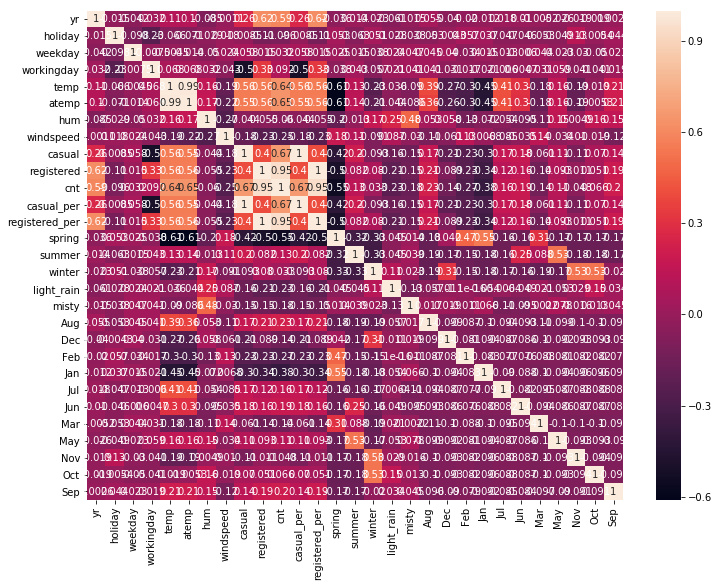

In [27]:
# plot the correlation between variables
plt.figure(figsize=(12,9))
res = df_train.corr()
sns.heatmap(res,annot=True)
plt.show()
# target variable cnt has high correlation with registered,casual,yr, and temp

In [28]:
y_train = df_train.pop('cnt')
X_train = df_train

In [29]:
# drop casual and registered because cnt is combination of both.So adding them in the model will lead to incorrect results.
# Casual and registerd are linearly related
#X_train.drop(['casual','registered'],inplace=True,axis=1)

#### Approach 1

In [30]:
#model 1 
# from the EDA we know that temparature has a linear relantionship with cnt
X_train_sm = sm.add_constant(X_train['temp'])
lr = sm.OLS(y_train,X_train_sm)

lr_model_1 = lr.fit()
lr_model_1.summary()

# r_squared is 0.414

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           5.80e-61
Time:                        11:23:17   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.000       0.131       0.208
temp           0.6400      0.034     18.949      0.000       0.574       0.706
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.555
Skew:                           0.098   Prob(JB):                        0.103
Kurtosis:                       2.580   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
#model 2 
# from the EDA we know that seasons spring, summer and winter help determine the demand. 
# fall has the highest demand
X_train_sm = sm.add_constant(X_train[['temp','registered']])
lr = sm.OLS(y_train,X_train_sm)

lr_model_2 = lr.fit()
lr_model_2.summary()

# r_squared is 0.919

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     2861.
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          7.00e-277
Time:                        11:23:17   Log-Likelihood:                 678.14
No. Observations:                 510   AIC:                            -1350.
Df Residuals:                     507   BIC:                            -1338.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0167      0.008     -2.070      0.039      -0.033      -0.001
temp           0.1660      0.015     10.938      0.000       0.136       0.196
registered     0.8419      0.015     56.055      0.000       0.812       0.871
==============================================================================
Omnibus:                      147.798   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.706
Skew:                           1.562   Prob(JB):                     1.69e-69
Kurtosis:                       5.267   Cond. No.                         8.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
vif_df = pd.DataFrame()

vif_df['Features']=X_train_sm.columns
vif_df['VIF']= [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif_df
# VIF of temp and registered are acceptable

,Features,VIF
0,const,8.039589
1,temp,1.450265
2,registered,1.450265


In [33]:
#model 3 
# from the EDA we know that yr plays an important role. The number of bike rentals increase in each year.
# fall has the highest demand
X_train_sm = sm.add_constant(X_train[['temp','registered','yr']])
lr = sm.OLS(y_train,X_train_sm)

lr_model_3 = lr.fit()
lr_model_3.summary()

# r_squared is 0.922
# p value of all the variables are acceptable

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     1996.
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          6.78e-280
Time:                        11:23:17   Log-Likelihood:                 689.27
No. Observations:                 510   AIC:                            -1371.
Df Residuals:                     506   BIC:                            -1354.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0161      0.008     -2.045      0.041      -0.032      -0.001
temp           0.1937      0.016     12.133      0.000       0.162       0.225
registered     0.7773      0.020     38.797      0.000       0.738       0.817
yr             0.0362      0.008      4.751      0.000       0.021       0.051
==============================================================================
Omnibus:                      132.272   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.746
Skew:                           1.441   Prob(JB):                     1.45e-57
Kurtosis:                       5.004   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
vif_df = pd.DataFrame()

vif_df['Features']=X_train_sm.columns
vif_df['VIF']= [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif_df


,Features,VIF
0,const,8.041224
1,temp,1.674466
2,registered,2.690270
3,yr,1.876620


In [35]:
#model 4 
# from the EDA we know that working days have higher rentals 
# fall has the highest demand
X_train_sm = sm.add_constant(X_train[['temp','registered','yr','workingday']])
lr = sm.OLS(y_train,X_train_sm)

lr_model_4 = lr.fit()
lr_model_4.summary()

# r_squared is 0.927
#On adding working day p value becomes insignificant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     3474.
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:23:17   Log-Likelihood:                 892.89
No. Observations:                 510   AIC:                            -1776.
Df Residuals:                     505   BIC:                            -1755.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0290      0.006      5.169      0.000       0.018       0.040
temp           0.1228      0.011     11.063      0.000       0.101       0.145
registered     0.9490      0.015     62.747      0.000       0.919       0.979
yr            -0.0055      0.005     -1.027      0.305      -0.016       0.005
workingday    -0.1119      0.005    -24.844      0.000      -0.121      -0.103
==============================================================================
Omnibus:                       78.628   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.275
Skew:                           0.906   Prob(JB):                     1.27e-31
Kurtosis:                       4.848   Cond. No.                         14.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
vif_df = pd.DataFrame()

vif_df['Features']=X_train_sm.columns
vif_df['VIF']= [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif_df

,Features,VIF
0,const,8.984525
1,temp,1.793328
2,registered,3.400007
3,yr,2.078868
4,workingday,1.270428


In [37]:
#model 5 
# Adding workingday to the model

X_train_sm = sm.add_constant(X_train[['temp','registered','workingday']])
lr = sm.OLS(y_train,X_train_sm)

lr_model_5 = lr.fit()
lr_model_5.summary()

# r_squared is 0.965
# On adding working day , yr and misty becomes insignificant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     4631.
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:23:17   Log-Likelihood:                 892.36
No. Observations:                 510   AIC:                            -1777.
Df Residuals:                     506   BIC:                            -1760.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0285      0.006      5.098      0.000       0.017       0.039
temp           0.1275      0.010     12.637      0.000       0.108       0.147
registered     0.9379      0.011     88.862      0.000       0.917       0.959
workingday    -0.1105      0.004    -25.810      0.000      -0.119      -0.102
==============================================================================
Omnibus:                       74.743   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.299
Skew:                           0.875   Prob(JB):                     1.87e-29
Kurtosis:                       4.778   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
vif_df = pd.DataFrame()

vif_df['Features']=X_train_sm.columns
vif_df['VIF']= [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif_df

,Features,VIF
0,const,8.914551
1,temp,1.482620
2,registered,1.655567
3,workingday,1.146831


In [39]:
#model 6 
# Adding workingday to the model
X_train_sm = sm.add_constant(X_train[['temp','registered','workingday','misty','light_rain']])
lr = sm.OLS(y_train,X_train_sm)

lr_model_6 = lr.fit()
lr_model_6.summary()

# r_squared is 0.543
# By adding light rain and misty, p value of workingday reduced.
# coeeficient of light rain and misty is negative. This means the demand for shared bikes is less incase of bad/slightly bad weather.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     2804.
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:23:18   Log-Likelihood:                 895.60
No. Observations:                 510   AIC:                            -1779.
Df Residuals:                     504   BIC:                            -1754.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0335      0.006      5.601      0.000       0.022       0.045
temp           0.1302      0.010     12.868      0.000       0.110       0.150
registered     0.9291      0.011     83.922      0.000       0.907       0.951
workingday    -0.1087      0.004    -25.153      0.000      -0.117      -0.100
misty         -0.0069      0.004     -1.707      0.088      -0.015       0.001
light_rain    -0.0249      0.012     -2.150      0.032      -0.048      -0.002
==============================================================================
Omnibus:                       80.555   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.970
Skew:                           0.910   Prob(JB):                     1.65e-33
Kurtosis:                       4.947   Cond. No.                         11.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
vif_df = pd.DataFrame()

vif_df['Features']=X_train_sm.columns
vif_df['VIF']= [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif_df

,Features,VIF
0,const,10.320320
1,temp,1.504578
2,registered,1.837502
3,workingday,1.178751
4,misty,1.066214
5,light_rain,1.106699


In [41]:
#model 6 
# Adding humidity to the model
X_train_sm = sm.add_constant(X_train[['temp','workingday','registered','windspeed']])
lr = sm.OLS(y_train,X_train_sm)
lr_model_6= lr.fit()
lr_model_6.summary()

# r_squared is 0.965

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     3495.
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:23:18   Log-Likelihood:                 894.34
No. Observations:                 510   AIC:                            -1779.
Df Residuals:                     505   BIC:                            -1757.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0380      0.007      5.165      0.000       0.024       0.052
temp           0.1262      0.010     12.517      0.000       0.106       0.146
workingday    -0.1102      0.004    -25.821      0.000      -0.119      -0.102
registered     0.9345      0.011     87.666      0.000       0.914       0.955
windspeed     -0.0225      0.011     -1.981      0.048      -0.045      -0.000
==============================================================================
Omnibus:                       78.686   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.318
Skew:                           0.913   Prob(JB):                     3.39e-31
Kurtosis:                       4.809   Cond. No.                         10.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
vif_df = pd.DataFrame()

vif_df['Features']=X_train_sm.columns
vif_df['VIF']= [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif_df

,Features,VIF
0,const,15.547013
1,temp,1.488971
2,workingday,1.147686
3,registered,1.698627
4,windspeed,1.064381


In [43]:
#model 7 
# Adding humidity to the model
X_train_sm = sm.add_constant(X_train[['temp','workingday','registered','windspeed','hum']])
lr = sm.OLS(y_train,X_train_sm)
lr_model_7= lr.fit()
lr_model_7.summary()

# r_squared is 0.965

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     2849.
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:23:18   Log-Likelihood:                 899.50
No. Observations:                 510   AIC:                            -1787.
Df Residuals:                     504   BIC:                            -1762.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0694      0.012      5.689      0.000       0.045       0.093
temp           0.1337      0.010     13.031      0.000       0.114       0.154
workingday    -0.1089      0.004    -25.598      0.000      -0.117      -0.101
registered     0.9260      0.011     85.061      0.000       0.905       0.947
windspeed     -0.0332      0.012     -2.829      0.005      -0.056      -0.010
hum           -0.0438      0.014     -3.211      0.001      -0.071      -0.017
==============================================================================
Omnibus:                       86.719   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.719
Skew:                           0.959   Prob(JB):                     3.80e-37
Kurtosis:                       5.052   Cond. No.                         16.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
#model 8 
# replacing workingday with yr.
X_train_sm = sm.add_constant(X_train[['temp','workingday','registered','windspeed','hum','summer']])
lr = sm.OLS(y_train,X_train_sm)

lr_model_8 = lr.fit()
lr_model_8.summary()

# p value of hum is high. So month is insignificant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     2590.
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:23:18   Log-Likelihood:                 921.41
No. Observations:                 510   AIC:                            -1829.
Df Residuals:                     503   BIC:                            -1799.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0714      0.012      6.103      0.000       0.048       0.094
temp           0.1267      0.010     12.804      0.000       0.107       0.146
workingday    -0.1096      0.004    -26.870      0.000      -0.118      -0.102
registered     0.9242      0.010     88.499      0.000       0.904       0.945
windspeed     -0.0436      0.011     -3.840      0.000      -0.066      -0.021
hum           -0.0443      0.013     -3.389      0.001      -0.070      -0.019
summer         0.0282      0.004      6.717      0.000       0.020       0.036
==============================================================================
Omnibus:                       86.686   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.415
Skew:                           0.947   Prob(JB):                     3.64e-38
Kurtosis:                       5.127   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
vif_df = pd.DataFrame()

vif_df['Features']=X_train_sm.columns
vif_df['VIF']= [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif_df

,Features,VIF
0,const,43.611871
1,temp,1.587199
2,workingday,1.160477
3,registered,1.805635
4,windspeed,1.179870
5,hum,1.158377
6,summer,1.037852


In [46]:
#model 8 
# Adding humidity to the model
#X_train_sm = sm.add_constant(X_train[['temp','workingday','registered','windspeed','hum','summer']])
#lr = sm.OLS(y_train,X_train_sm)

#lr_model_9 = lr.fit()
#lr_model_9.summary()

# p value of all varaibles is <0.05, so they are significant

In [47]:
vif_df = pd.DataFrame()

vif_df['Features']=X_train_sm.columns
vif_df['VIF']= [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif_df

,Features,VIF
0,const,43.611871
1,temp,1.587199
2,workingday,1.160477
3,registered,1.805635
4,windspeed,1.179870
5,hum,1.158377
6,summer,1.037852


## Residual analysis and prediction

### Assumptions of Linear Regression

- There should be a linear relationship between predictor variables X and target variable y
-  residual error terms follow a normal distribution, with mean error at 0.
-  The Error terms are independent of each other
-  Error terms have constant variance

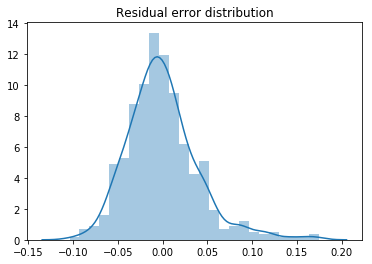

In [48]:
#model 9 is the best so far. Model 9 will be used for prediction
X_train_sm = sm.add_constant(X_train[['temp','workingday','registered','windspeed','hum','summer']])

y_train_pred=lr_model_8.predict(X_train_sm)
res = y_train - y_train_pred
sns.distplot(res)
plt.title("Residual error distribution")
plt.show()

# error terms follow normal distribution

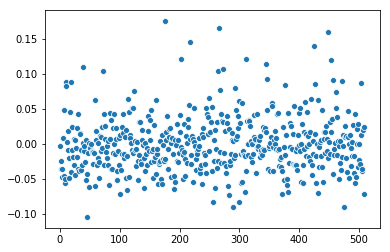

In [49]:
index = np.arange(y_train.shape[0])
sns.scatterplot(index,res)
plt.show()

# the error terms are randomly scattered. Error terms are independent on each other
#We can find that many error terms are closing in on 0. Therefore mean is 0


In [50]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_true=y_train,y_pred=y_train_pred)
r_squared

0.9686438665759222

In [51]:
# rescaling of test data
var_list =['temp','atemp','hum','windspeed','cnt','casual','registered']
df_test[var_list]=scaler.transform(df_test[var_list])
df_test.head()

C:\Users\Rakshu\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Rakshu\Anaconda\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
184,0,1,1,0,0.831783,0.769660,0.657364,0.084219,0.933557,0.427086,...,0,0,0,1,0,0,0,0,0,0
535,1,0,3,1,0.901354,0.842587,0.610133,0.153728,0.265163,0.767976,...,0,0,0,0,1,0,0,0,0,0
299,0,0,4,1,0.511964,0.496145,0.837699,0.334206,0.072539,0.346376,...,0,0,0,0,0,0,0,0,1,0
221,0,0,3,1,0.881625,0.795343,0.437098,0.339570,0.268820,0.559630,...,0,0,0,0,0,0,0,0,0,0
152,0,0,4,1,0.817246,0.741471,0.314298,0.537414,0.223712,0.608143,...,0,0,0,0,1,0,0,0,0,0


In [52]:
y_test = df_test.pop('cnt')
X_test = df_test

In [53]:
# prediction with model 8 
imp_var_list=['temp','workingday','registered','windspeed','hum','summer']
X_test_sm = sm.add_constant(X_test[imp_var_list])
y_test_pred = lr_model_8.predict(X_test_sm)
res = y_test - y_test_pred

In [54]:
r_squared = r2_score(y_true=y_test,y_pred=y_test_pred)
r_squared


0.9572284021463322

## Conclusion

